# Using the CRISP-DM Method for MLN 601 Machine Learning
#Assessment 3: Machine Learning Project






Adapted from Smart Vision Europe (2020)https://www.sv-europe.com/crisp-dm-methodology/ and Patience (2018) https://grantpatience.com/2018/10/30/applying-crisp-dm-to-data-science-and-a-re-usable-template-in-jupyter/

CRISP-DM is a process used to guide data mining and machine learning projects. It breaks down the work into six main steps to help data teams solve problems in an organized way.

First, there's the Business Understanding phase. This is where the team figures out what the company or organization needs and how data can help. It's about setting clear goals based on business priorities.

Next is Data Understanding, where the team collects the data they need and starts exploring it. They check the data for problems and try to spot any patterns or insights early on.

In the Data Preparation phase, the team gets the data ready for analysis. They clean it up, fix any mistakes, and choose the parts that are most useful for the project.

Then comes Modeling. This is where the team applies different algorithms or techniques to the data to create models that can predict outcomes or find patterns. They might try several methods to see which works best.

Once the models are built, the team moves to Evaluation. Here, they check how well the models perform and make sure they meet the goals set in the first phase. If the models don’t work as expected, they might need to go back and make adjustments.

Finally, in Deployment, the results are put into action. This could mean creating reports, making business decisions, or integrating the model into a company's systems.

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>
This stage focuses on understanding the project's goals from a business perspective. It involves identifying the main problem or question the business wants to solve and defining the data mining objectives that align with those goals. The team works closely with stakeholders to clarify what the business needs and translates those needs into a clear plan for the data analysis. The goal is to ensure that the project stays focused on delivering value to the business.

## 1.1 Assess the Current Situation<a class="anchor"></a>

The data represents a banking institution initiating a marketing campaign through phone calls. The goal of the data is to use classification analysis to predict if the customer will subscribe a term deposit. There are 45211 entries in the data with 17 different variables which are as follows
1 - **age**
2 - **job**
3 - **marital status**
4 - **education level**
5 - **default** (does the client have credit in default?)
6 - **balance** (the client's average yearly balance)
7 - **housing** (does the client have a housing loan?)
8 - **loan** (does the client have a personal loan?)
9 - **contact** (contact communication type)
10 - **day_of_week** (last contact day of the week)
11 - **month** (last contact month of the year)
12 - **duration** (last contact duration, in seconds)
13 - **campaign** (number of contacts performed during this campaign and for this client)
14 - **pdays** (number of days that passed by after the client was last contacted)
15 - **previous** (number of contacts performed before this campaign and for this client)
16 - **poutcome** (outcome of the previous marketing campaign)
17 - **y** (has the client subscribed a term deposit?)

In the context of the bank, it is important to ensure to know the information of the clients that have been marketed to, along with their demographs and other variables to predict the likeliness of them signing up for term deposits. This information can also provide insight to what would attract the certain demographic to subscribe for them, thus helping create marketing strategies for them.

# 2. Stage  Two - Data Understanding <a class="anchor"></a>
In this phase, the user gathers and explores the data they will use for the project. They examine the data to understand its structure, patterns, and quality, checking for any issues like missing or inconsistent values. The goal is to gain insights into the data and assess whether it’s suitable for the project, while also identifying any initial patterns that might help in the later stages of modeling and analysis.

## 2.1 Initial Data Acquisition <a class="anchor"></a>
The data being used was acquied from the dataset called "Bank Marketing" https://archive.ics.uci.edu/dataset/222/bank+marketing. The CSV file was then exported to my Google Drive, as I am using Google Colab to write this code.

In [109]:
# Import libraries
# Basic libraries
import pandas as pd
import numpy as np
import warnings

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn-v0_8-whitegrid')

Mounting the Google Drive where the dataset is

In [110]:
#Data source:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accessing the dataset

In [111]:
#Source Query location:
bank = pd.read_csv("/content/drive/My Drive/dataset/bank-full.csv")

## 2.2 Describe Data <a class="anchor"></a>
Once the data was mounted, I displayed the number of rows and columns in the dataset head, examined the sample along with the information of all variables. I found that none of the variables had a null value, making my data complete and the cleaning part simpler. I also asked for information such as the count, mean, standard deviation, minimum, and maximum amount of each variable.

In [112]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


The dataset contains a mix of numerical and categorical data, with 17 features in total. The output variable is labeled as 'y'. According to the dataset documentation, the 'duration' column should be removed because, in real-life scenarios, the duration is only known after the output is determined. Including this column could lead to "data leakage," where the predictors use information that would not be available when making predictions.

In [113]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [114]:
bank.shape

(45211, 17)

In [115]:
# Drop 'duration' column
bank = bank.drop('duration', axis=1)

# print bank info
print('Shape of dataset:', bank.shape)
bank.head()

Shape of dataset: (45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


The 'duration' column has been removed from the dataset. The updated dataset now has 45,211 rows and 16 columns.

In [116]:
bank.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


## 2.3 Verify Data Quality <a class="anchor"></a>

### 2.3.1. Outliers <a class="anchor"></a>
As mentioned earlier, there were no outliers or null values in this dataset. I checked again and the display results were the same.

In [117]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## 2.4 Initial Data Exploration  <a class="anchor"></a>

### 2.4.1 Histogram  <a class="anchor"></a>

<Axes: xlabel='previous', ylabel='Count'>

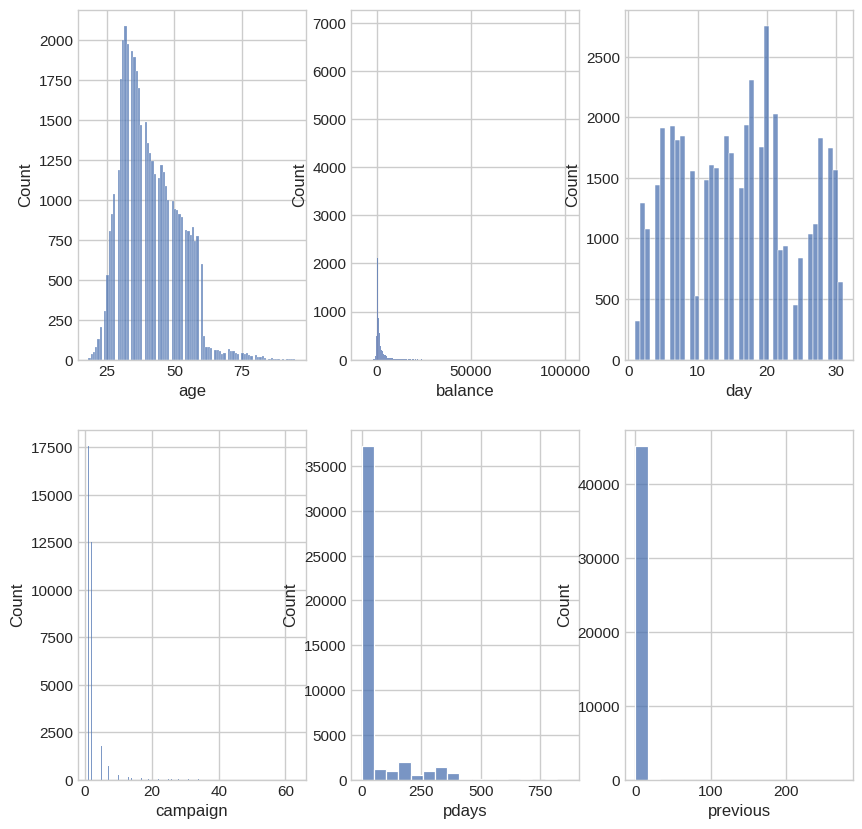

In [118]:
fig, axes = plt.subplots(2, 3)
sns.histplot(data=bank, x='age', ax=axes[0,0])
sns.histplot(data=bank, x='balance', ax=axes[0,1])
sns.histplot(data=bank, x='day', ax=axes[0,2])
sns.histplot(data=bank, x='campaign', ax=axes[1,0])
sns.histplot(data=bank, x='pdays', ax=axes[1,1])
sns.histplot(data=bank, x='previous', ax=axes[1,2])

### 2.4.2 Distribution Plot  <a class="anchor"></a>

<Axes: xlabel='age'>

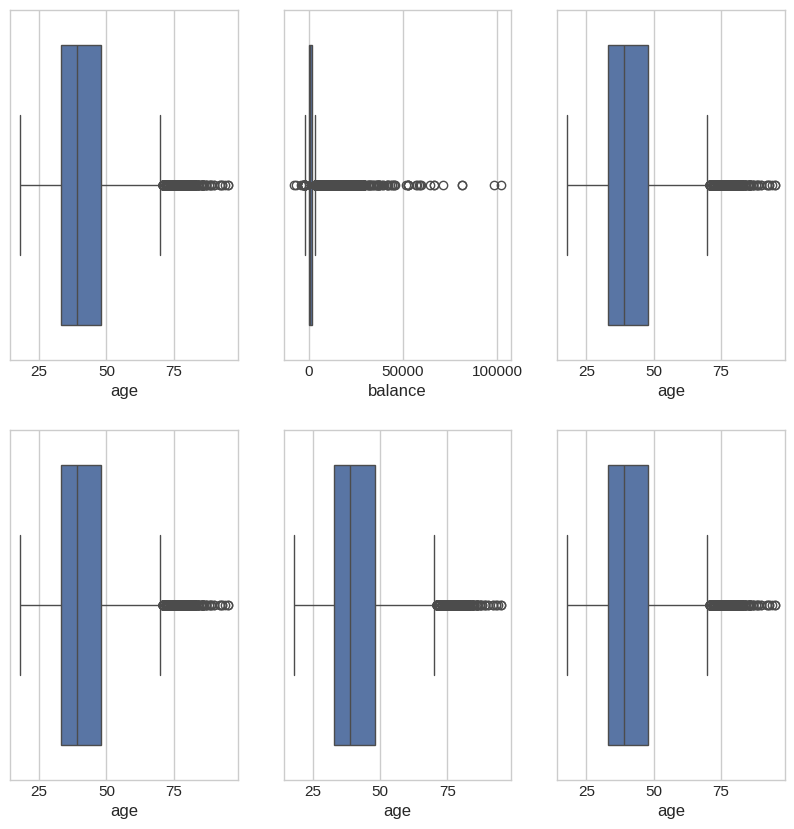

In [119]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3)

#create boxplot in each subplot
sns.boxplot(data=bank, x='age', ax=axes[0,0])
sns.boxplot(data=bank, x='balance', ax=axes[0,1])
sns.boxplot(data=bank, x='age', ax=axes[0,2])
sns.boxplot(data=bank, x='age', ax=axes[1,0])
sns.boxplot(data=bank, x='age', ax=axes[1,1])
sns.boxplot(data=bank, x='age', ax=axes[1,2])

<Axes: xlabel='previous', ylabel='Density'>

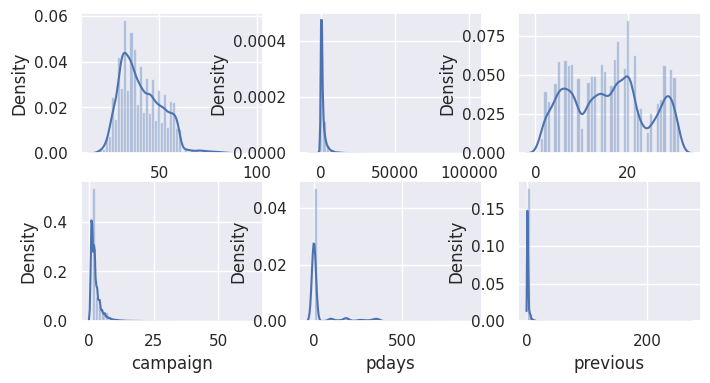

In [120]:
from pylab import *
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,3,1)
sns.distplot(bank['age'])
subplot(2,3,2)
sns.distplot(bank['balance'])
subplot(2,3,3)
sns.distplot(bank['day'])
subplot(2,3,4)
sns.distplot(bank['campaign'])
subplot(2,3,5)
sns.distplot(bank['pdays'])
subplot(2,3,6)
sns.distplot(bank['previous'])

### 2.4.3 Class Distribution  <a class="anchor"></a>

y
no     39922
yes     5289
Name: count, dtype: int64


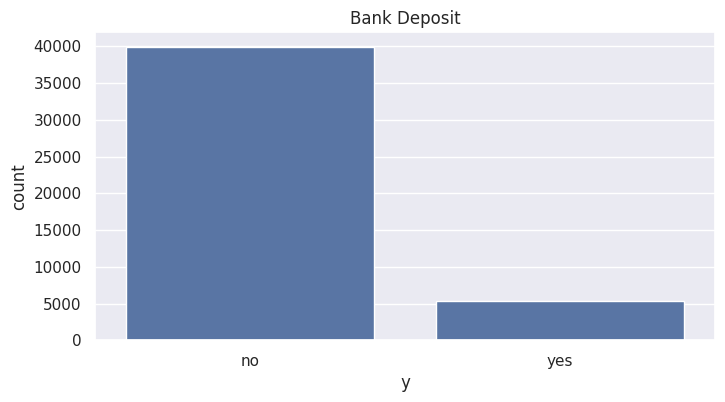

In [121]:
print(bank.y.value_counts())
axes1 = sns.countplot(x='y', data=bank)
# Provide a title
plt.title('Bank Deposit');

Out of 45,211 people in the dataset, 5,289 subscribed to the bank deposit product, while 39,922 did not. Since the number of people who did not subscribe is much higher than those who did, this dataset is considered imbalanced.

In [107]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

The dataset includes 16 features, which are: age, job, marital status, education, default status, account balance, housing loan status, personal loan status, contact method, day, month, campaign, number of days since a previous contact (pdays), number of previous contacts (previous), outcome of previous marketing campaigns (poutcome), and the output variable, 'y'.

In [122]:
bank.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


The dataset contains both numerical and categorical data. The numerical features are age, balance, day, campaign, pdays, and previous. The categorical features include job, marital status, education, default status, housing loan status, personal loan status, contact method, month, outcome of previous campaigns (poutcome), and the output variable 'y'.

### 2.4.4 Correlation Heatmap  <a class="anchor"></a>

<Axes: >

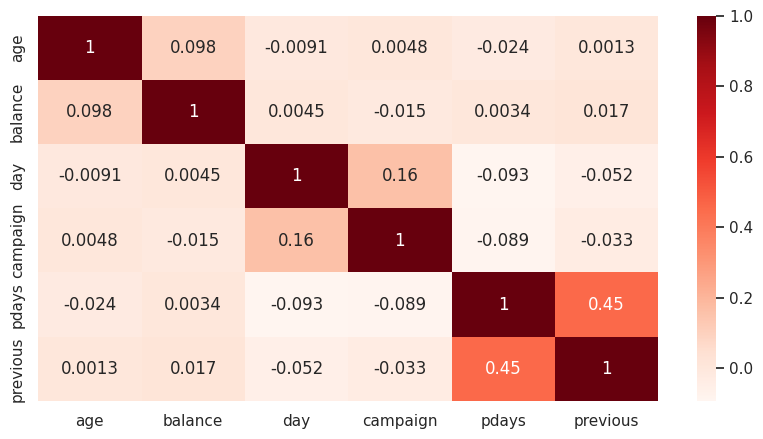

In [123]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= bank.corr(numeric_only = True)
sns.heatmap(c,cmap="Reds",annot=True)

# 3. Stage Three - Data Preparation <a class="anchor"></a>


## 3.1 Standardize Your Data <a class="anchor"></a>

In [124]:
from sklearn.preprocessing import StandardScaler

# Copy original dataframe to bank_numerical
bank_num = bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
bank_num[num_cols] = scaler.fit_transform(bank_num[num_cols])
bank_num = bank_num.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], axis=1)
bank_num.head()

,age,balance,day,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194


## 3.2 Encode Categorical Features <a class="anchor"></a>

In [125]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Copy original dataframe to bank_numerical
bank_target = bank.copy()

# Drop all features and keep target 'y'
bank_target = bank_target.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1)

# Encode target value yes to 1 and no to 0
bank_target['y'] = bank_target['y'].apply(lambda x: 1 if x == 'yes' else 0)

bank_target.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [126]:
# OneHot encoder method is used to encode the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
catg_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Copy original dataframe to bank_numerical
bank_catg = bank.copy()

bank_catg.head()
# Encode categorical Data to Numerical
encoded = pd.DataFrame(encoder.fit_transform(bank_catg[catg_cols]))
encoded.columns = encoder.get_feature_names_out(catg_cols)

# Replace Categotical Data with Encoded Data
bank_catg = bank_catg.drop(catg_cols ,axis=1)
bank_catg = pd.concat([bank_num, encoded, bank_target], axis=1)

print('Shape of dataframe:', bank_catg.shape)
bank_catg.head()

Shape of dataframe: (45211, 51)


,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.606965,0.256419,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.288529,-0.437895,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,-0.747384,-0.446762,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.571051,0.047205,-1.298476,-0.569351,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.747384,-0.447091,-1.298476,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


# 4. Stage Four - Modelling <a class="anchor"></a>

## 4.1. Modelling technique <a class="anchor"></a>
The data is divided into two parts: training and testing. The split is done using an 75:25 ratio, meaning 75% of the data is used for training and 25% for testing. This results in 33,908 rows for the training data and 11,303 rows for the testing data.

In [127]:
# Select Features
feature = bank_catg.drop('y', axis=1)

# Select Target
target = bank_catg['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.25,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)


Shape of training feature: (33908, 50)
Shape of testing feature: (11303, 50)
Shape of training label: (33908,)
Shape of training label: (11303,)


To evaluate the model, we will use a confusion matrix as the foundation for our assessment. Six key metrics are used to evaluate the model's performance:  

1. **Accuracy**: This measures the proportion of correct predictions out of the total cases. It is based on true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).  
2. **Precision**: This calculates the percentage of predicted positive cases that are actually positive.  
3. **Recall**: This measures how well the model identifies actual positive cases.  
4. **F1 Score**: This is the harmonic mean of precision and recall, ranging between 0 and 1.  
5. **Cohen’s Kappa Score**: This metric evaluates the agreement between two raters by classifying items into mutually exclusive categories.  

These metrics help provide a comprehensive understanding of the model's performance.

In [128]:
# function to evaluate and calculate accuracy, precision, recall, F1-score and kappa score
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## 4.2. Modelling assumptions <a class="anchor"></a>
As there are no null values, there won't be any missing variables. The null quality ratings that weren't in the dataset were also omitted earlier.

## 4.3. Build Model <a class="anchor"></a>
The models chosen for this dataset are:

*   Decision Tree Model
*   Logistic Regression Model
*   Random Forest Model
*   Naive Bayes Model
*   K-Nearest Model



## 4.3.1 Decision Tree Model <a class="anchor"></a>

A decision tree is a diagram shaped like a tree that helps in making decisions. Each branch of the tree represents a possible choice, event, or outcome, guiding the path to follow based on the situation.


In [129]:
from sklearn import tree

# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# 4.3.2 Logistic Regression Model <a class="anchor"></a>

In logistic regression, a linear equation is used to calculate the input, but instead of producing a direct output, a sigmoid function is applied to the result. This transforms the output into a value between 0 and 1, making it suitable for predicting probabilities.


In [130]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

# 4.3.3 Random Forest Model <a class="anchor"></a>

Random forest, also known as a random decision forest, is a technique that creates multiple decision trees during the training process. The final decision is determined by the majority vote of all the trees, making it a robust and reliable method for predictions.


In [131]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# 4.3.4 Naive Bayes Model <a class="anchor"></a>

Naive Bayes is a straightforward method for creating classifiers, which are models that assign a class label to data based on certain features. The class labels come from a specific set of possible categories. There isn't just one algorithm for training these classifiers, but rather a group of algorithms that follow the same basic idea. All Naive Bayes classifiers assume that each feature's value is independent of the others, as long as you know the class label. In other words, the value of one feature doesn't affect the value of another when the class is known.


In [132]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

# 4.3.5 K-Nearest Neighbours <a class="anchor"></a>

K-Nearest Neighbors (KNN) is a method for classifying new data by looking at the closest neighbors in the training data. It chooses the class based on the most common class among these neighbors. For example, if you set k to 3, the new data will be classified based on the majority class of its 3 nearest neighbors. If most of the neighbors belong to class B, the new data will be classified as B. However, if you increase k to 7, the majority might change, and the new data could be classified as A, depending on the neighbors.[link text](https://)

In [133]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 5. Stage 5 - Evaluate  <a class="anchor"></a>
The accuracy of the models was tested to see how efficient they were. A score of over 80% was achieved for all of them, making the models very efficient.

# 5.1 Decision Tree Model Evaluation <a class="anchor"></a>


Accuracy: 0.8258869326727417
Precision: 0.27646662171274444
Recall: 0.31417624521072796
F1 Score: 0.29411764705882354
Cohens Kappa Score: 0.19527544436330424
Area Under Curve: 0.6034273904589347
Confusion Matrix:
 [[8925 1073]
 [ 895  410]]


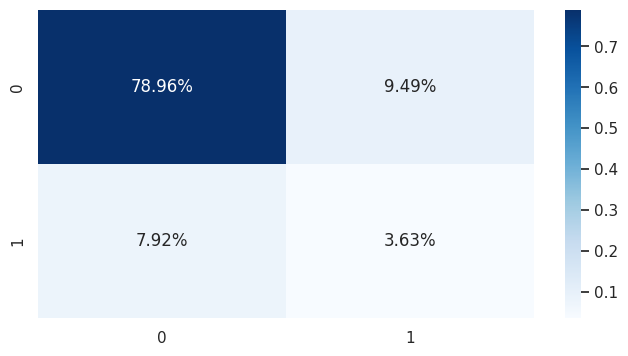

In [90]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

# 5.2 Logistic Regression Model Evaluation <a class="anchor"></a>

Accuracy: 0.8940989117933292
Precision: 0.6421052631578947
Recall: 0.18697318007662836
F1 Score: 0.28961424332344216
Cohens Kappa Score: 0.25058853407504433
Area Under Curve: 0.7772857253443026
Confusion Matrix:
 [[9862  136]
 [1061  244]]


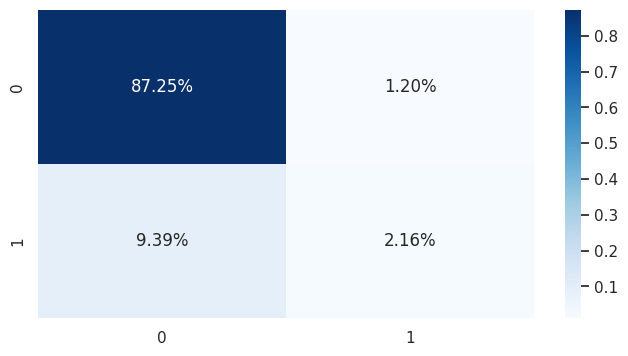

In [92]:
# Evaluate Logistic Regression Model
lr_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# 5.3 Random Forest Model Evaluation <a class="anchor"></a>


Accuracy: 0.8933026630098204
Precision: 0.5879218472468917
Recall: 0.25363984674329504
F1 Score: 0.354389721627409
Cohens Kappa Score: 0.3060975514154698
Area Under Curve: 0.7836880019682098
Confusion Matrix:
 [[9766  232]
 [ 974  331]]


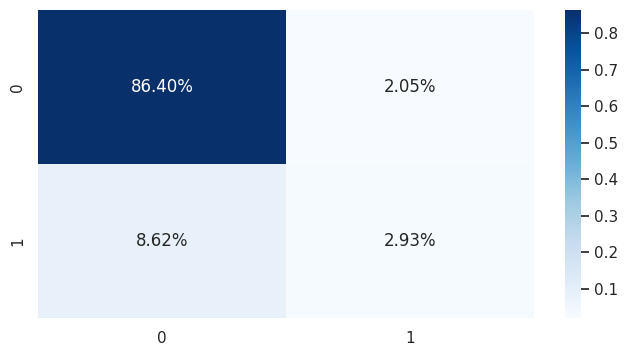

In [94]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# 5.4 Naive Bayes Model Evaluation <a class="anchor"></a>


Accuracy: 0.8384499690347695
Precision: 0.3488102147417295
Recall: 0.46053639846743294
F1 Score: 0.39696169088507266
Cohens Kappa Score: 0.30573994867005194
Area Under Curve: 0.7497003615282443
Confusion Matrix:
 [[8876 1122]
 [ 704  601]]


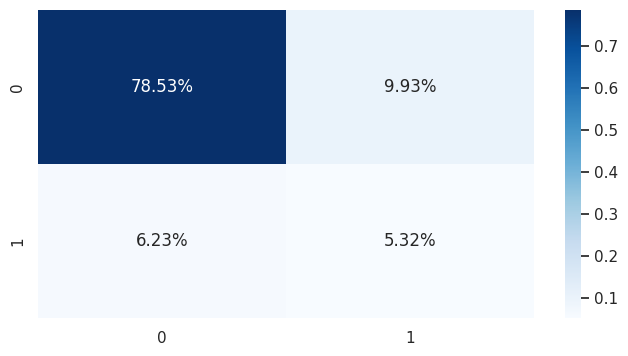

In [134]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

# 5.5 K-Nearest Neighbour Model Evaluation <a class="anchor"></a>


Accuracy: 0.8877289215252587
Precision: 0.5343511450381679
Recall: 0.21455938697318008
F1 Score: 0.306178239475123
Cohens Kappa Score: 0.2570266462794346
Area Under Curve: 0.7044016466128475
Confusion Matrix:
 [[9754  244]
 [1025  280]]


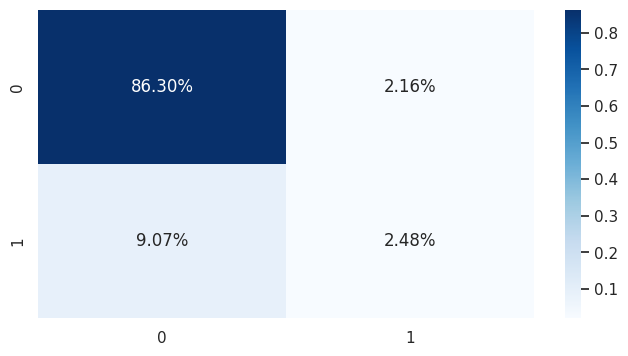

In [135]:
# Evaluate KNN Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

# 6. Stage 6 - Deploy  <a class="anchor"></a>

As this assessment did not require proper deployment, I am going to provide some insights on what I learned. This project overall was a lot more fruitful than my previous ones as I was able to apply myslef more and challenge myself to apply multiple models. I learned how to analyze and predict whether a person will make a bank deposit based on various characteristics using different machine learning models. The main models used were Decision Tree, Logistic Regression, Random Forest, Naive Bayes, and K-Nearest Neighbors. One key lesson was the importance of cleaning and preparing data, such as handling imbalanced data and encoding categorical values. I also understood the significance of evaluating models using metrics like accuracy, precision, recall, F1 score, and AUC. The Random Forest and Logistic Regression models performed the best overall. Finally, I gained insights into how each model handles data differently and the importance of comparing results to choose the best one for real-world applications.